 create and measure the relative performances of Random Forest and XGBoost regression models for predicting house prices using the California Housing Dataset. 'Performance' means both speed and accuracy.

In [3]:
!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install xgboost==2.1.3

  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [5]:
# Loading the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#numbers of observations and features
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))


Number of Observations: 20640
Number of Features: 8


(A moderately sized dataset used for this analysis.)
We are only using one dataset, comparison may change with scale.

Initializing models

Now we define the number of base estimators, or individual trees, to be used in each model, and then intialize models for Random Forest regression and XGBoost regression. We'll just use the default parameters to make the performance comparisons. As a part of the performance comparison, we'll also measure the training times for both models.

In [7]:
# Initialize models
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [8]:
# Fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

In [9]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

In [10]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [11]:

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


You can see from the MSE and R^2 values that XGBoost is better than Random Forest, but the differences aren't overwhelming.


In [12]:
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')

Random Forest:  Training Time = 28.509 seconds, Testing time = 0.146 seconds
      XGBoost:  Training Time = 0.420 seconds, Testing time = 0.013 seconds


What is very impressive is the difference in computation time between XGBoost and Random Forest for both training and testing.

Next, is to generate scatter plots between the predicted and actual values for both models so we can visually evaluate how well each model performs. We'll also plot lines one standard deviation of the test data above and below the ideal line, that is, the line that represents the perfect regressor, where the predictions are all correct.


In [13]:
# Standard deviation of y_test
std_y = np.std(y_test)

In [14]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
std_y = np.std(y_test)

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 28.509 seconds, Testing time = 0.166 seconds
      XGBoost:  Training Time = 0.420 seconds, Testing time = 0.008 seconds


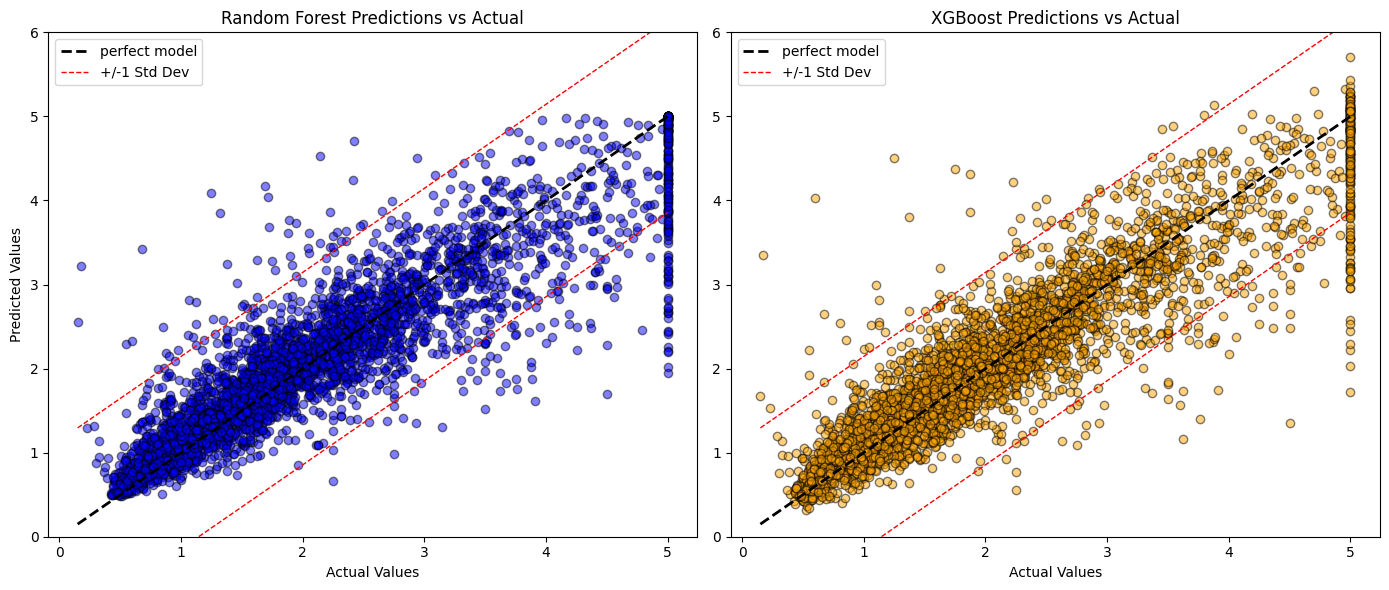

In [15]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Both models performed very well. Most of their predictions fall within a standard deviation of the target. Interestingly, random forest "respects" the upper bound (the maximum value) present in the target by staying within its limits, while XGBoost "overshoots", or exceeds this limit. 